In [2]:
from nltk.tokenize import sent_tokenize
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
import glob
import os
from os import path
import string
import numpy
import re
from __future__ import absolute_import, division, print_function
import pandas as pd
import multiprocessing
import gensim
import random
from tqdm import tqdm
import pandas as pd
from gensim.models import KeyedVectors
from numpy import array
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [9]:
os.chdir('C://Users//Ruben//Documents//GitHub//TheForeign//SCC//output-data')

list_vocab_names = ['vreemde', 'buitenlandsche', 'binnenlandsche', 'vaderlandsche', 'europeesche', 'nationale']

dfop = pd.DataFrame()
for year in list(range(1820,1911,10)):
    
    year = str(year)
    
    os.chdir('C://Users//Ruben//Documents//GitHub//TheForeign//SCC//output-data')
    dfo = pd.DataFrame()

    for vocab_name in list_vocab_names:
        fn = "bigrams_" + vocab_name + ".csv"
        df = pd.read_csv(fn)
        df = df.melt(id_vars=['ngram'])
        df['variable'] = [x - x % 10 for x in list(df.variable.astype(int))]
        df = pd.pivot_table(df, index=['ngram'], columns=['variable'], aggfunc=sum, fill_value=0)
        df.columns = df.columns.get_level_values(1)
        df.columns = df.columns.astype(str)
        df['ngram'] = list(df.index)
        df = df[['ngram', year]]
        df = df[df[year] > 0]

        list_vocabulary = list(df.ngram)


        list_other_vocab_names = [x for x in list_vocab_names if x != vocab_name]

        for other_vocab_name in list_other_vocab_names:
            fn = "bigrams_" + other_vocab_name + ".csv"
            df = pd.read_csv(fn)
            df = df[['ngram', year]]
            df = df[df[year] > 0]

            list_other_vocabulary = list(df.ngram)

            combined_list = list_other_vocabulary + list_vocabulary

            shared_list = list([item for item, count in Counter(combined_list).items() if count > 1])

            non_overlap_list = len(combined_list) - (len(shared_list) * 2)



            overlap = len(shared_list) / (len(shared_list) + non_overlap_list) * 100

            tmp = pd.DataFrame([vocab_name, other_vocab_name, overlap]).T
            tmp.columns = ['source', 'target', 'weight']
            dfo = dfo.append(tmp)

    dfo = dfo.drop_duplicates(subset=['weight'])
    dfo['year'] = year
    dfop = dfop.append(dfo)

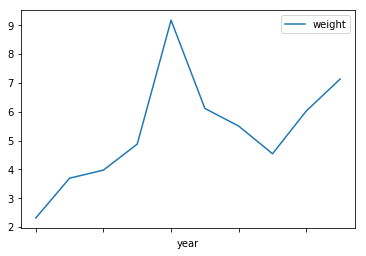

In [11]:
d = dfop[(dfop.source == "vreemde") & (dfop.target == 'buitenlandsche')]
d.plot(x="year", y="weight")

In [ ]:
os.chdir('C://Users//Ruben//Desktop')
dfo.to_csv('ntw_' + year + ".csv", index = False)